In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils 

Using TensorFlow backend.


In [0]:
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input  ##flatten for maxpool
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam

## load input data(x)

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#for CNN, reshape data to (28,28,1) ;rgb1->3
x_train = x_train.reshape(len(x_train), 28,28,1)  
x_test = x_test.reshape(len(x_test), 28,28,1)

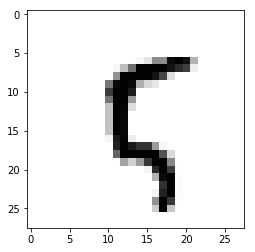

In [6]:
plt.imshow(x_train[100].reshape(28,28), cmap = 'Greys')

In [0]:
#nomralize
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

## y - one-hot encoding (utils.to_catagorial )

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## construct CNN (function API)

In [0]:
f1 = Conv2D(4,#filiters' num
           (5,5), #filiter's size
           padding = 'same', ## padding-> 加多少0使輸出形狀一樣
           input_shape = (28,28,1),
           activation = 'relu')
f1_1 = MaxPool2D(pool_size=(2,2))

f2 = Conv2D(8,#filiters' num
           (5,5), #filiter's size
           padding = 'same', ## padding-> 加多少0使輸出形狀一樣
           activation = 'relu')
f2_1 = MaxPool2D(pool_size=(2,2))

f3 = Conv2D(16,#filiters' num
           (5,5), #filiter's size
           padding = 'same', ## padding-> 加多少0使輸出形狀一樣
           activation = 'relu')
f3_1 = MaxPool2D(pool_size=(2,2))

f4 = Conv2D(32,#filiters' num
           (5,5), #filiter's size
           padding = 'same', ## padding-> 加多少0使輸出形狀一樣
           activation = 'relu')
f4_1 = MaxPool2D(pool_size=(2,2))

f5 = Flatten()

f6 = Dense(50, activation='relu')

f7 = Dense(10, activation='softmax')

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x = Input(shape = (28, 28, 1))
x

<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [12]:
hid1 = f1(x)
hid1_1 = f1_1(hid1)

hid2 = f2(hid1_1)
hid2_1 = f2_1(hid2)

hid3 = f3(hid2_1)
hid3_1 = f3_1(hid3)

hid4 = f4(hid3_1)
hid4_1 = f4_1(hid4)

hid5 = f5(hid4_1)

hid6 = f6(hid5)

y = f7(hid6)


Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model = Model(x,y) #產生model包輸入輸出
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
__________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001, 
                                                                beta_1=0.9, 
                                                                beta_2=0.999, 
                                                                epsilon=None, 
                                                                decay=0.0, 
                                                                amsgrad=False),
              metrics=['acc'])

In [0]:
model1 = model.fit(x_train,y_train, batch_size = 100, epochs = 100,
         verbose = 1,
         validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 54s 900us/step - loss: 0.4167 - acc: 0.8719 - val_loss: 0.1394 - val_acc: 0.9561
Epoch 2/100
60000/60000 [==============================] - 54s 892us/step - loss: 0.1272 - acc: 0.9613 - val_loss: 0.0919 - val_acc: 0.9701
Epoch 3/100
60000/60000 [==============================] - 54s 893us/step - loss: 0.0959 - acc: 0.9699 - val_loss: 0.0728 - val_acc: 0.9762
Epoch 4/100
60000/60000 [==============================] - 54s 895us/step - loss: 0.0778 - acc: 0.9750 - val_loss: 0.0596 - val_acc: 0.9813
Epoch 5/100
60000/60000 [==============================] - 53s 889us/step - loss: 0.0673 - acc: 0.9784 - val_loss: 0.0654 - val_acc: 0.9789
Epoch 6/100
60000/60000 [==============================] - 54s 899us/step - loss: 0.0582 - acc: 0.9818 - val_loss: 0.0720 - val_acc: 0.9771
Epoch 7/100
60000/60000 [==============================] - 54s